<a href="https://colab.research.google.com/github/aniruddhha/100-days-of-ml/blob/main/project-pythom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopy tabulate

In [70]:
import pandas as pd
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

import time
from geopy.exc import GeocoderTimedOut, GeocoderServiceError

In [26]:
cloud_kitchen_locations = [
   "1 Front St W, Toronto, ON M5J 2X5, Canada",
    "10 Avenue of the Arts, Boston, MA 02116",
    "1440 1st Ave, New York, NY 10021",
    "20 W 34th St, New York, NY 10001",
    "1001 3rd Ave, Seattle, WA 98104",
    "3601 S Broad St, Philadelphia, PA 19148",
    "200 E 25th St, New York, NY 10010",
    "1000 E 41st St, Austin, TX 78751",
    "2000 E Convention Center Way, Ontario, CA 91764",
    "1000 E 14th St, Cleveland, OH 44114",
    "1600 Pennsylvania Ave NW, Washington, DC 20500",
    "2000 E Convention Center Way, Ontario, CA 91764",
    "900 E Main St, Richmond, VA 23219",
    "2500 Victory Ave, Dallas, TX 75219",
    "50 N 3rd St, Phoenix, AZ 85004",
    "1001 W University Ave, Urbana, IL 61801",
    "1 E 161st St, Bronx, NY 10451",
    "1 Museum Way, San Francisco, CA 94130",
    "100 Universal City Plaza, Universal City, CA 91608",
    "25th St, San Francisco, CA 94107",
    "9500 Gilman Dr, La Jolla, CA 92093",
    "1600 Holloway Ave, San Francisco, CA 94132",
   "9599 Universal Blvd, Orlando, FL 32819",
]
len(cloud_kitchen_locations)

23

In [102]:
data = {'Address': cloud_kitchen_locations}
df = pd.DataFrame(data)
df.to_csv('cloud_kitchen_locations.csv', index=False)

In [114]:
data = pd.read_csv('hotel-addresses.csv')

In [115]:
def geocode_with_delay(address, geolocator, max_retries=5, delay=2):
    retries = 0
    while retries < max_retries:
        time.sleep(delay)
        try:
            location = geolocator.geocode(address, timeout=10)
            if location:
                return location.latitude, location.longitude
            else:
                return None

        except (GeocoderTimedOut, GeocoderServiceError):
            retries += 1

    return None


geolocator = Nominatim(user_agent="ani_requests")
coordinates = data['address'].apply(lambda x: geocode_with_delay(x, geolocator))


In [117]:
coordinates

0                    (28.5370446, -81.3774396)
1                                         None
2                                         None
3                                         None
4                    (28.5173611, -81.3639966)
5                    (28.5419309, -81.4075839)
6                                         None
7      (28.56774220169646, -81.34750807446191)
8                      (28.511931, -81.372053)
9                    (28.4944003, -81.4135404)
10                   (28.5279579, -81.4343381)
11                                        None
12                   (28.4587148, -81.3101582)
13     (28.53894279718032, -81.30806156524885)
14               (28.567774125, -81.344144625)
15                     (28.55314, -81.3751535)
16    (28.563980790697673, -81.36678958139535)
17                   (28.5631065, -81.3895725)
18    (28.542878369022056, -81.39718238068907)
19                   (28.5443978, -81.4077597)
20     (28.55297899655011, -81.41567471147606)
21           

In [86]:
def impute_coordinates(coordinates_list):
    imputed_coordinates = []
    for coord in coordinates_list:
        if coord is None:
            imputed_coordinates.append((0, 0))  # Replace None with a default value, you can change it as needed
        else:
            imputed_coordinates.append(coord)
    return imputed_coordinates




In [118]:
coordinates = impute_coordinates(coordinates)
coordinates

[(28.5370446, -81.3774396),
 (0, 0),
 (0, 0),
 (0, 0),
 (28.5173611, -81.3639966),
 (28.5419309, -81.4075839),
 (0, 0),
 (28.56774220169646, -81.34750807446191),
 (28.511931, -81.372053),
 (28.4944003, -81.4135404),
 (28.5279579, -81.4343381),
 (0, 0),
 (28.4587148, -81.3101582),
 (28.53894279718032, -81.30806156524885),
 (28.567774125, -81.344144625),
 (28.55314, -81.3751535),
 (28.563980790697673, -81.36678958139535),
 (28.5631065, -81.3895725),
 (28.542878369022056, -81.39718238068907),
 (28.5443978, -81.4077597),
 (28.55297899655011, -81.41567471147606),
 (28.53037175, -81.39754652425927),
 (0, 0),
 (28.537866, -81.3972181),
 (0, 0)]

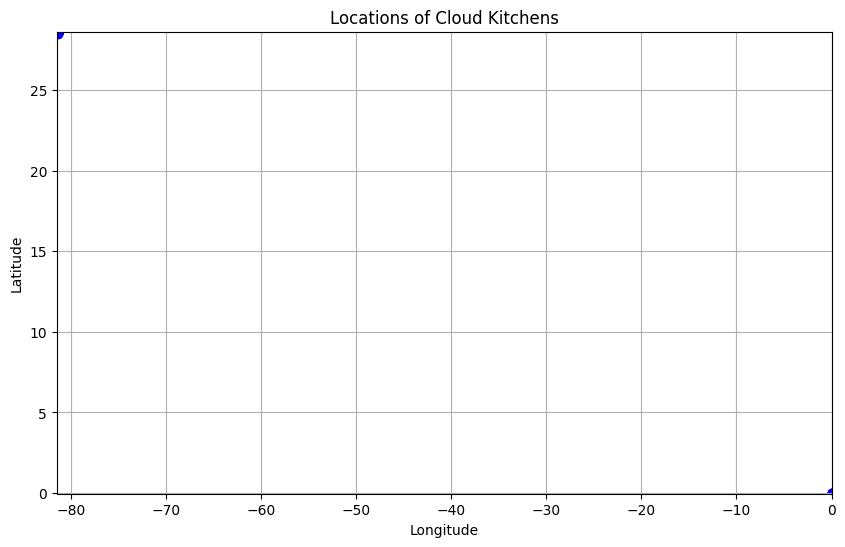

In [119]:
lats = [coordinate[0] for coordinate in coordinates]
lons = [coordinate[1] for coordinate in coordinates]

# Calculate the boundaries of the plot region
min_lat, max_lat = min(lats), max(lats)
min_lon, max_lon = min(lons), max(lons)

# Add 2.5 miles to the boundaries
buffer = 2.5 / 69  # Approximate miles to degrees conversion
min_lat -= buffer
max_lat += buffer
min_lon -= buffer
max_lon += buffer

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(lons, lats, marker='o', color='b', label='Cloud Kitchens')
plt.title('Locations of Cloud Kitchens')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Setting the plot boundaries
plt.xlim(min_lon, max_lon)
plt.ylim(min_lat, max_lat)

# Display the plot
plt.show()

In [130]:
np.random.seed(0)  # Set a random seed
sample_service_stations = 50

service_stations = []
random_lats = np.random.uniform(min_lat, max_lat, sample_service_stations)
random_lons = np.random.uniform(min_lon, max_lon, sample_service_stations)

for i in range(sample_service_stations):
    print(f"Random Point {i + 1}: Latitude {random_lats[i]}, Longitude {random_lons[i]}")
    service_stations.append((random_lats[i], random_lons[i]))

Random Point 1: Latitude 15.681917427375131, Longitude -34.99565479176827
Random Point 2: Latitude 20.44696170747498, Longitude -45.72156332722884
Random Point 3: Latitude 17.22705459989162, Longitude -0.9113793937353165
Random Point 4: Latitude 15.569352100931384, Longitude -73.15322381274906
Random Point 5: Latitude 12.09734235356856, Longitude -64.44569361018151
Random Point 6: Latitude 18.462329167934186, Longitude -68.32274707036427
Random Point 7: Latitude 12.496369945490727, Longitude -28.237799101932765
Random Point 8: Latitude 25.504359004998662, Longitude -60.82558152099038
Random Point 9: Latitude 27.563298825428323, Longitude -43.463070211891
Random Point 10: Latitude 10.945624433209998, Longitude -61.54822168528639
Random Point 11: Latitude 22.63896155256582, Longitude -68.51346762680572
Random Point 12: Latitude 15.11144443812568, Longitude -72.47424522201362
Random Point 13: Latitude 16.232699479562882, Longitude -27.975244175330054
Random Point 14: Latitude 26.473076029

In [121]:
table = tabulate(data, headers='keys', tablefmt='grid')
table

'+----+------+-------------------------------------------------------------+-----------+\n|    |   sr | address                                                     |   zipcode |\n+====+======+=============================================================+===========+\n|  0 |    1 | 25 S Magnolia Ave, Orlando, FL                              |     32801 |\n+----+------+-------------------------------------------------------------+-----------+\n|  1 |    2 | 390 N Orange Ave Suite 110, Orlando, FL                     |     32801 |\n+----+------+-------------------------------------------------------------+-----------+\n|  2 |    3 | 4200 Conroy Rd A146, Orlando, FL                            |     32839 |\n+----+------+-------------------------------------------------------------+-----------+\n|  3 |    4 | Grand Bohemian Hotel Orlando, 325 S Orange Ave, Orlando, FL |     32801 |\n+----+------+-------------------------------------------------------------+-----------+\n|  4 |    5 | 1103 N

In [125]:
def distance(lat1, lon1, lat2, lon2):
    R = 3959  # Radius of the Earth in miles
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance_miles = R * c
    return distance_miles


In [131]:
d_matrix = np.zeros((len(coordinates), len(service_stations)))

In [132]:
for i in range(len(coordinates)):
    for j in range(len(service_stations)):
        d_matrix[i][j] = distance(coordinates[i][0], coordinates[i][1], service_locations[j][0], service_stations[j][1])

In [133]:
d_matrix

array([[3078.46835102, 2301.48833127, 5093.32662134, ..., 1722.20264813,
        4558.55469689, 1254.71144983],
       [2621.25543144, 3395.73321461, 1191.96206378, ..., 5517.62072725,
        1141.14808783, 5613.13420272],
       [2621.25543144, 3395.73321461, 1191.96206378, ..., 5517.62072725,
        1141.14808783, 5613.13420272],
       ...,
       [2621.25543144, 3395.73321461, 1191.96206378, ..., 5517.62072725,
        1141.14808783, 5613.13420272],
       [3079.66762405, 2302.68837266, 5094.49387851, ..., 1722.33647099,
        4559.75664352, 1254.7880045 ],
       [2621.25543144, 3395.73321461, 1191.96206378, ..., 5517.62072725,
        1141.14808783, 5613.13420272]])